In [18]:
import uproot
import pandas as pd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt


In [12]:
fn = "output2.root"
#fn = "combined.root"

file = uproot.open(fn)

if fn == "combined.root":
    events = file["analyzer"]["tree1"]
else:
    events = file["tree1"]
    
events.keys()

['trigflag',
 'NKpiCand',
 'NKpiMC',
 'run_n',
 'event_n',
 'lumi',
 'LambdaMass',
 'LambdaVtxProb',
 'LambdaVtxLSig',
 'LambdaVtxLSig3D',
 'LambdaVtxPosx',
 'LambdaVtxPosy',
 'LambdaVtxPosz',
 'LambdaVtxerrx',
 'LambdaVtxerry',
 'LambdaVtxerrz',
 'LambdaVtxcxy',
 'LambdaVtxcxz',
 'LambdaVtxcyz',
 'Lambdaeta',
 'Lambdaphi',
 'LamdaVertexCAx',
 'LamdaVertexCAy',
 'LamdaVertexCAz',
 'cosAlpha',
 'cosAlpha3D',
 'flightLength',
 'flightLength_noPXB1',
 'flightLength_noPXB1_error',
 'LambdaSharedHitLayer',
 'LambdaSharedHitLadder',
 'LambdaSharedHitModule',
 'LambdaSharedHitPixelHits_x',
 'LambdaSharedHitPixelHits_y',
 'LambdaSharedHitPixelHits_adc',
 'PionPixelHit_x',
 'PionPixelHit_y',
 'PionPixelHit_adc',
 'ProtonPixelHit_x',
 'ProtonPixelHit_y',
 'ProtonPixelHit_adc',
 'PionPixelHitLayer',
 'ProtonPixelHitLayer',
 'ntracks',
 'PVOrder',
 'nPV',
 'PVx',
 'PVy',
 'PVz',
 'PVerrx',
 'PVerry',
 'PVerrz',
 'PVcxy',
 'PVcxz',
 'PVcyz',
 'BSx',
 'BSy',
 'BSz',
 'BSerrx',
 'BSerry',
 'BSerrz',


In [13]:
df0 = events.pandas.df(["Gen*Pt", "Gen*Eta", "Gen*Phi", "Gen*Mass", "LambdaMass", "Gen*E", "Gen*DeltaR", "nUniqueSimTracksInSharedHit", "sharedHitContainsGen*", "uniqueSimTrackIds"], flatten=False)


In [22]:
pd.set_option('display.max_columns', None)
df0

,GenLambdaPt,GenProtonPt,GenPionPt,GenLambdaEta,GenProtonEta,GenPionEta,GenLambdaPhi,GenProtonPhi,GenPionPhi,GenLambdaMass,GenProtonMass,GenPionMass,LambdaMass,GenLambdaE,GenProtonE,GenPionE,GenDeltaR,GenProtonDeltaR,GenPionDeltaR,nUniqueSimTracksInSharedHit,sharedHitContainsGenLambda,sharedHitContainsGenPion,sharedHitContainsGenProton,uniqueSimTrackIds
entry,,,,,,,,,,,,,,,,,,,,,,,,
0,[2.946552976155766],[2.3139709729386215],[0.6327107726970203],[1.8831514534185654],[1.8606080843932746],[1.9615102571811625],[-0.5873774118829068],[-0.582489016365827],[-0.6052562965521804],[1.115683000000019],[0.9382720129999971],[0.13957010000000442],[1.160754082022082],[9.972307144166429],[7.674265983607309],[2.2980411605591895],[0.8473228150606048],[0.4337233082068305],[0.4135995068537743],[-99],[False],[False],[False],[]
1,[1.0618269608669832],[0.8717276081243888],[0.20194823941237344],[0.5760725178183327],[0.5008131687611003],[0.8426409499250168],[-2.0373211167323904],[-2.1081779518112005],[-1.7267484228971473],[1.1156829999999998],[0.9382720129999997],[0.13957010000000003],[1.085664646674967],[1.6702258275213107],[1.3591675037260662],[0.3110583237952448],[1.8893430256647523],[0.7006738987592852],[1.1886691269054672],[-99],[False],[False],[False],[]
2,[0.4532284335545232],[0.3676440444486746],[0.11678203620066967],[-3.671032677657325],[-3.7699044957069203],[-2.7711422399304073],[-0.8877550268419595],[-1.082715168267034],[-0.23184901783416523],[1.115683000000019],[0.9382720130000046],[0.13957010000000164],[1.0886589006830745],[8.979577277224942],[8.032674127379984],[0.9469031498447888],[7.132372380184125],[4.002500218901616],[3.129872161282509],[1],[False],[False],[False],[[11]]
3,[1.105097056717692],[0.8166735850194614],[0.2907591762165156],[-1.5704767090927456],[-1.6736432956380813],[-1.2054969350215898],[0.22372274104866233],[0.2624413177267942],[0.1147832585486914],[1.1156830000000009],[0.9382720130000004],[0.13957009999999975],[1.0915752928272087],[2.9881662565456506],[2.4411750269282715],[0.5469912296173829],[2.1565745038057873],[3.1723953757603356],[3.430166656884788],[-99],[False],[False],[False],[]
4,[],[],[],[],[],[],[],[],[],[],[],[],[1.116430358792366],[],[],[],[],[],[],[],[],[],[],[]
5,[0.5753712118447145],[0.43226893267505084],[0.15429397869432696],[-1.5603475854126445],[-1.5546094938655528],[-1.5087827128099462],[-0.036613249170797585],[0.07913306015785353],[-0.366092649543756],[1.1156829999999998],[0.9382720129999998],[0.13957010000000014],[1.1532138162292294],[1.813701328332321],[1.4221213344403314],[0.391579993891989],[3.6022883221684685],[1.625204513419614],[1.9770838087488547],[-99],[False],[False],[False],[]
6,[1.6739142021661222],[1.3151778219569017],[0.36808809066830717],[1.5175198509642345],[1.512144683812747],[1.5135960126971073],[0.1326104436827269],[0.07703827484540768],[0.33239383440233866],[1.1156830000000009],[0.9382720129999998],[0.13957009999999964],[1.1160981459967818],[4.153435062849065],[3.2657636063487008],[0.8876714565003622],[0.01347665018692187],[0.000405107275386524],[0.013071542911535346],[-99],[False],[False],[False],[]
7,[3.366175664571815],[2.9960797616247974],[0.3819850587497502],[1.924757256731193],[1.9201380865000321],[1.9310613357575475],[-1.1347249497990608],[-1.1645018014997337],[-0.8990301197868944],[1.1156830000000255],[0.9382720130000197],[0.13957009999999884],[1.116980592742763],[11.83331075390588],[10.48115313492468],[1.3521576189809648],[0.005813998100490002],[3.044042625526473],[2.9952526580456227],[-99],[False],[False],[False],[]
8,[],[],[],[],[],[],[],[],[],[],[],[],[1.1255185697075465],[],[],[],[],[],[],[],[],[],[],"[[-211, 211]]"


In [15]:
df = events.pandas.df(["Gen*Pt", "Gen*Eta", "Gen*Phi", "Gen*Mass", "Gen*E", "Gen*DeltaR", "nUniqueSimTracksInSharedHit", "sharedHitContainsGen*", "uniqueSimTrackIds"], flatten=True)

In [17]:
pd.set_option('display.max_columns', 60)
df

,,GenLambdaPt,GenProtonPt,GenPionPt,GenLambdaEta,GenProtonEta,GenPionEta,GenLambdaPhi,GenProtonPhi,GenPionPhi,GenLambdaMass,GenProtonMass,GenPionMass,GenLambdaE,GenProtonE,GenPionE,GenDeltaR,GenProtonDeltaR,GenPionDeltaR,nUniqueSimTracksInSharedHit,sharedHitContainsGenLambda,sharedHitContainsGenPion,sharedHitContainsGenProton,uniqueSimTrackIds
entry,subentry,,,,,,,,,,,,,,,,,,,,,,,
0,0,2.946553,2.313971,0.632711,1.883151,1.860608,1.961510,-0.587377,-0.582489,-0.605256,1.115683,0.938272,0.13957,9.972307,7.674266,2.298041,0.847323,0.433723,0.413600,-99,False,False,False,[]
1,0,1.061827,0.871728,0.201948,0.576073,0.500813,0.842641,-2.037321,-2.108178,-1.726748,1.115683,0.938272,0.13957,1.670226,1.359168,0.311058,1.889343,0.700674,1.188669,-99,False,False,False,[]
2,0,0.453228,0.367644,0.116782,-3.671033,-3.769904,-2.771142,-0.887755,-1.082715,-0.231849,1.115683,0.938272,0.13957,8.979577,8.032674,0.946903,7.132372,4.002500,3.129872,1,False,False,False,[[11]]
3,0,1.105097,0.816674,0.290759,-1.570477,-1.673643,-1.205497,0.223723,0.262441,0.114783,1.115683,0.938272,0.13957,2.988166,2.441175,0.546991,2.156575,3.172395,3.430167,-99,False,False,False,[]
5,0,0.575371,0.432269,0.154294,-1.560348,-1.554609,-1.508783,-0.036613,0.079133,-0.366093,1.115683,0.938272,0.13957,1.813701,1.422121,0.391580,3.602288,1.625205,1.977084,-99,False,False,False,[]
6,0,1.673914,1.315178,0.368088,1.517520,1.512145,1.513596,0.132610,0.077038,0.332394,1.115683,0.938272,0.13957,4.153435,3.265764,0.887671,0.013477,0.000405,0.013072,-99,False,False,False,[]
7,0,3.366176,2.996080,0.381985,1.924757,1.920138,1.931061,-1.134725,-1.164502,-0.899030,1.115683,0.938272,0.13957,11.833311,10.481153,1.352158,0.005814,3.044043,2.995253,-99,False,False,False,[]
9,0,0.438938,0.265212,0.174421,-2.328237,-2.636630,-1.539374,0.760151,0.805726,0.690821,1.115683,0.938272,0.13957,2.532147,2.084575,0.447572,3.447772,2.004880,1.442893,-99,False,False,False,[]
10,0,5.624670,4.327621,1.297910,0.319841,0.312353,0.344478,2.377965,2.368383,2.409919,1.115683,0.938272,0.13957,6.019131,4.636386,1.382744,0.370003,0.143738,0.226265,-99,False,False,False,[]


In [8]:
def plotGenDeltaR(df, title):
    
    df = df[df['GenDeltaR']<0.1]

    plt.rcParams.update({'font.size': 14})

    fig= plt.figure(figsize=(10,3))
    ax = fig.add_subplot(1, 1, 1)
    xAxis = np.arange(8)
    xBins = np.arange(0, 7, 0.2)
    plt.hist(df['GenProtonDeltaR'], bins = xBins, label='Proton', alpha = 0.7, color = 'b', align='left')
    plt.xticks(xAxis)
    plt.xlabel('$\Delta$ R')
    plt.ylabel('Number of hits')
    plt.title('%s Hit, Proton GenDeltaR' %(title))
    ax.set_xticks(xBins - 0.1, minor=True)
    ax.xaxis.grid(True, which='minor')
    plt.show()

    fig= plt.figure(figsize=(10,3)) 
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(df['GenPionDeltaR'], bins = xBins, label='Pion', alpha = 0.7, color = 'r', align='left')
    plt.xticks(xAxis)
    plt.xlabel('$\Delta$ R')
    plt.ylabel('Number of hits')
    plt.title('%s Hit, Pion GenDeltaR' %(title))
    ax.set_xticks(xBins - 0.1, minor=True)
    ax.xaxis.grid(True, which='minor')
    plt.show()

    fig= plt.figure(figsize=(10,3)) 
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(df['GenDeltaR'], bins = xBins, label='Lambda', alpha = 0.7, color = 'g', align='left')
    plt.xticks(xAxis)
    plt.xlabel('$\Delta$ R')
    plt.ylabel('Number of hits')
    plt.title('%s Hit, Lambda GenDeltaR' %(title))
    ax.set_xticks(xBins - 0.1, minor=True)
    ax.xaxis.grid(True, which='minor')
    plt.show()

In [27]:
# df = events.pandas.df(["Gen*Pt", "Gen*Eta", "Gen*Phi", "Gen*Mass", "Gen*E", "Gen*DeltaR", "nUniqueSimTracksInSharedHit", "sharedHitContainsGen*", "uniqueSimTrackIds"])
df = df[df["nUniqueSimTracksInSharedHit"]>-1]
dfshared = df[df['nUniqueSimTracksInSharedHit']>0]
dfmerged = dfshared[dfshared['nUniqueSimTracksInSharedHit']>1]
dfnotmerged = dfshared[dfshared['nUniqueSimTracksInSharedHit'] == 1]

dfsharedprotonpion = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == True)]
dfsharedprotononly = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == True)]
dfsharedpiononly = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == False)]
dfsharedlambda = dfshared[(dfshared['sharedHitContainsGenLambda'] == True)]
dfsharedother = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['sharedHitContainsGenLambda'] == False)]

dfmergedprotonpion = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == True) & (dfshared['nUniqueSimTracksInSharedHit']>1)]
dfmergedprotononly = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == True) & (dfshared['nUniqueSimTracksInSharedHit']>1)]
dfmergedpiononly = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['nUniqueSimTracksInSharedHit']>1)]
dfmergedlambda = dfshared[(dfshared['sharedHitContainsGenLambda'] == True) & dfshared['nUniqueSimTracksInSharedHit']>1]
dfmergedother = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['sharedHitContainsGenLambda'] == False) & (dfshared['nUniqueSimTracksInSharedHit']>1)]

dfnotmergedprotonpion = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == True) & (dfshared['nUniqueSimTracksInSharedHit']==1)]
dfnotmergedprotononly = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == True) & (dfshared['nUniqueSimTracksInSharedHit']==1)]
dfnotmergedpiononly = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['nUniqueSimTracksInSharedHit']==1)]
dfnotmergedlambda = dfshared[(dfshared['sharedHitContainsGenLambda'] == True) & dfshared['nUniqueSimTracksInSharedHit']==1]
dfnotmergedother = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['sharedHitContainsGenLambda'] == False) & (dfshared['nUniqueSimTracksInSharedHit']==1)]


In [10]:
print("Shared, TOTAL: %i" %(len(dfshared)))
print("")
print("Shared, Proton AND Pion: %i" %(len(dfsharedprotonpion)))
print("Shared, Proton Only: %i" %(len(dfsharedprotononly)))
print("Shared, Pion Only: %i" %(len(dfsharedpiononly)))
print("Shared, Contains Lambda: %i" %(len(dfsharedlambda)))
print("Shared, Other: %i" %(len(dfsharedother)))

print("")
print("")
print("Merged, TOTAL: %i" %(len(dfmerged)))
print("")
print("Merged, Proton AND Pion: %i" %(len(dfmergedprotonpion)))
print("Merged, Proton Only: %i" %(len(dfmergedprotononly)))
print("Merged, Pion Only: %i" %(len(dfmergedpiononly)))
print("Merged, ContainsLambda: %i" %(len(dfmergedlambda)))
print("Merged, Other: %i" %(len(dfmergedother)))
print("")
print("")
print("Not Merged, TOTAL: %i" %(len(dfnotmerged)))
print("")
print("Not Merged, Proton AND Pion: %i" %(len(dfnotmergedprotonpion)))
print("Not Merged, Proton Only: %i" %(len(dfnotmergedprotononly)))
print("Not Merged, Pion Only: %i" %(len(dfnotmergedpiononly)))
print("Not Merged, Contains Lambda: %i" %(len(dfnotmergedlambda)))
print("Not Merged, Other: %i" %(len(dfnotmergedother)))



Shared, TOTAL: 102802

Shared, Proton AND Pion: 8338
Shared, Proton Only: 4686
Shared, Pion Only: 535
Shared, Contains Lambda: 132
Shared, Other: 89111


Merged, TOTAL: 48897

Merged, Proton AND Pion: 8338
Merged, Proton Only: 23
Merged, Pion Only: 15
Merged, ContainsLambda: 0
Merged, Other: 40459


Not Merged, TOTAL: 53905

Not Merged, Proton AND Pion: 0
Not Merged, Proton Only: 4663
Not Merged, Pion Only: 520
Not Merged, Contains Lambda: 76
Not Merged, Other: 48652


In [11]:
dfsharedlambda[['nUniqueSimTracksInSharedHit', 'uniqueSimTrackIds']]

,,nUniqueSimTracksInSharedHit,uniqueSimTrackIds
entry,subentry,,
8290,0,1,[[22]]
9128,0,1,[[-211]]
11297,0,1,[[-211]]
11298,0,1,[[-211]]
24289,0,1,[[2212]]
24293,0,1,[[2212]]
24295,0,1,[[2212]]
24298,0,1,[[2212]]
24300,0,1,[[2212]]


In [26]:
pd.set_option('display.max_colwidth', -1)
dfshared[dfshared['nUniqueSimTracksInSharedHit']>4]

,,GenLambdaPt,GenProtonPt,GenPionPt,GenLambdaEta,GenProtonEta,GenPionEta,GenLambdaPhi,GenProtonPhi,GenPionPhi,GenLambdaMass,...,GenDeltaR,GenProtonDeltaR,GenPionDeltaR,nUniqueSimTracksInSharedHit,nUniqueSimTracksInPionHit,nUniqueSimTracksInProtonHit,sharedHitContainsGenLambda,sharedHitContainsGenPion,sharedHitContainsGenProton,uniqueSimTrackIds
entry,subentry,,,,,,,,,,,,,,,,,,,,,
3421,0,0.238443,0.134751,0.119342,-3.191452,-3.636912,-1.764683,-2.672329,-2.341221,-3.048181,1.115683,...,5.346916,3.282074,2.064842,5,0,0,False,False,False,"[[211, 211, -211, 2212, 211]]"
6520,0,0.265507,0.256106,0.100811,-2.940969,-2.840681,-1.874621,-2.544759,-2.157430,2.452934,1.115683,...,3.345411,2.622103,0.723308,5,0,0,False,False,False,"[[-211, 211, -211, -321, -321]]"
43585,0,1.204306,0.895624,0.309501,0.999063,1.093623,0.679394,2.728256,2.706577,2.791025,1.115683,...,0.475869,1.430570,1.502707,13,0,0,False,False,False,"[[-321, 211, -211, 321, 211, 211, 2212, 321, -321, -321, 130, 22, -321]]"
43586,0,1.204306,0.895624,0.309501,0.999063,1.093623,0.679394,2.728256,2.706577,2.791025,1.115683,...,0.475869,1.430570,1.502707,13,0,0,False,False,False,"[[-321, 211, -211, 321, 211, 211, 2212, 321, -321, -321, 130, 22, -321]]"
43587,0,1.204306,0.895624,0.309501,0.999063,1.093623,0.679394,2.728256,2.706577,2.791025,1.115683,...,0.475869,1.430570,1.502707,13,0,0,False,False,False,"[[-321, 211, -211, 321, 211, 211, 2212, 321, -321, -321, 130, 22, -321]]"
43588,0,1.204306,0.895624,0.309501,0.999063,1.093623,0.679394,2.728256,2.706577,2.791025,1.115683,...,0.475869,1.430570,1.502707,13,0,0,False,False,False,"[[-321, 211, -211, 321, 211, 211, 2212, 321, -321, -321, 130, 22, -321]]"
43589,0,1.204306,0.895624,0.309501,0.999063,1.093623,0.679394,2.728256,2.706577,2.791025,1.115683,...,0.475869,1.430570,1.502707,13,0,0,False,False,False,"[[-321, 211, -211, 321, 211, 211, 2212, 321, -321, -321, 130, 22, -321]]"
43590,0,1.204306,0.895624,0.309501,0.999063,1.093623,0.679394,2.728256,2.706577,2.791025,1.115683,...,0.475869,1.430570,1.502707,13,0,0,False,False,False,"[[-321, 211, -211, 321, 211, 211, 2212, 321, -321, -321, 130, 22, -321]]"
43591,0,1.204306,0.895624,0.309501,0.999063,1.093623,0.679394,2.728256,2.706577,2.791025,1.115683,...,0.475869,1.430570,1.502707,13,0,0,False,False,False,"[[-321, 211, -211, 321, 211, 211, 2212, 321, -321, -321, 130, 22, -321]]"


In [12]:
dfshared[['nUniqueSimTracksInSharedHit', 'uniqueSimTrackIds']]

,,nUniqueSimTracksInSharedHit,uniqueSimTrackIds
entry,subentry,,
2,0,1,[[11]]
20,0,2,"[[11, -11]]"
61,0,2,"[[11, -11]]"
65,0,2,"[[211, -211]]"
71,0,1,[[11]]
86,0,2,"[[-11, 11]]"
96,0,1,[[2212]]
117,0,1,[[-11]]
118,0,1,[[11]]


Total Shared Hits: 102802


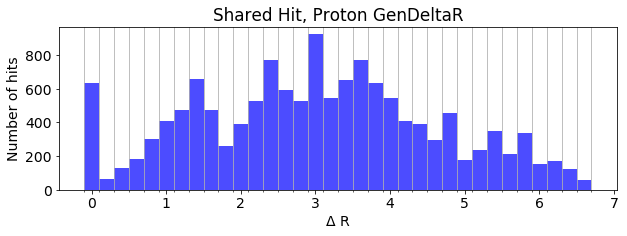

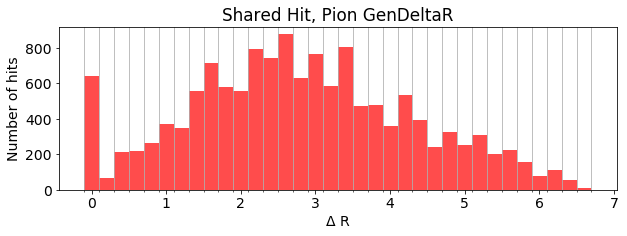

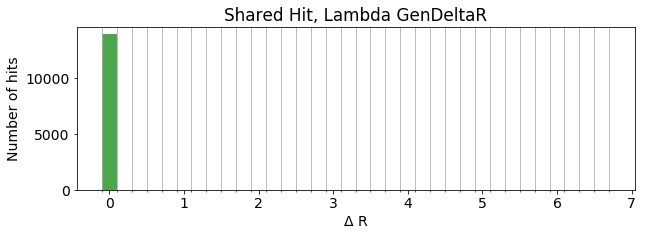

In [13]:
print("Total Shared Hits: %i" %(len(dfshared)))
plotGenDeltaR(dfshared, 'Shared')

Total Merged Hits: 48897


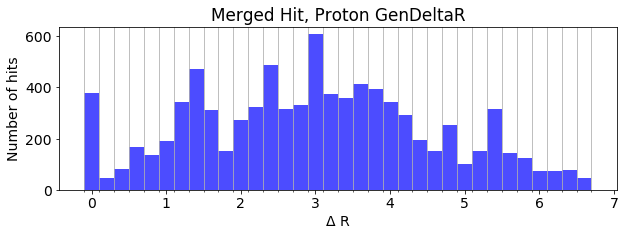

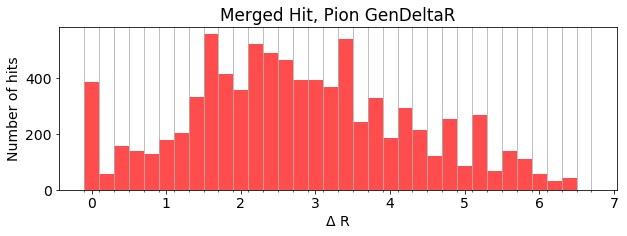

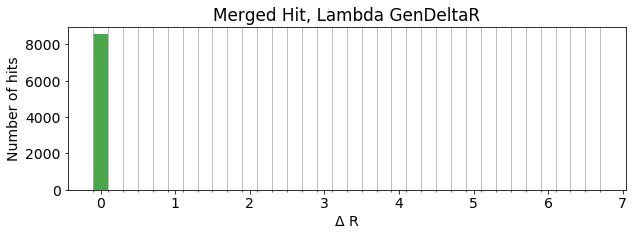

In [14]:
print("Total Merged Hits: %i" %(len(dfmerged)))
plotGenDeltaR(dfmerged, 'Merged')


Total Shared Hits with Proton AND Pion: 8338


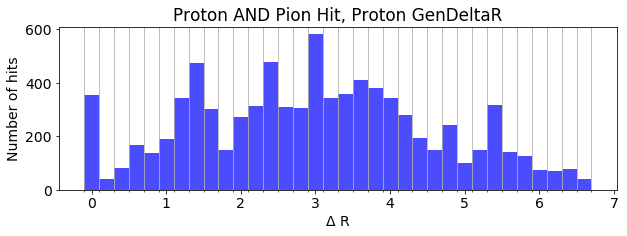

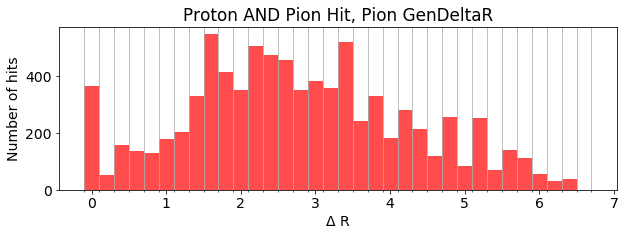

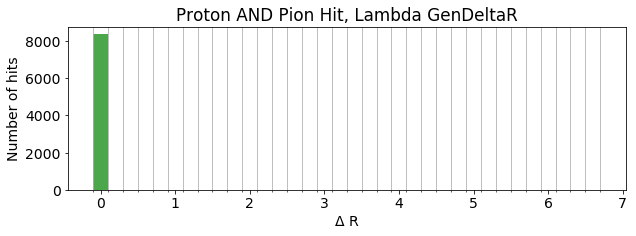

In [15]:
print("Total Shared Hits with Proton AND Pion: %i" %(len(dfsharedprotonpion)))
plotGenDeltaR(dfsharedprotonpion, 'Proton AND Pion')


Total Shared Hits with Proton Only: 4686


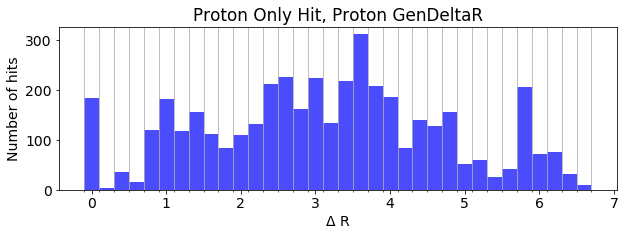

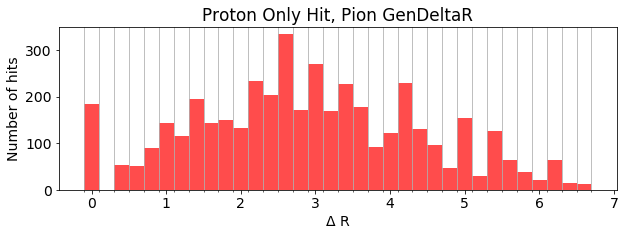

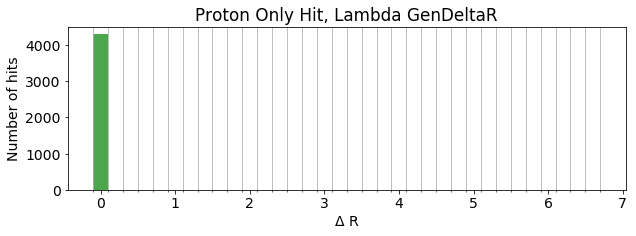

In [16]:
print("Total Shared Hits with Proton Only: %i" %(len(dfsharedprotononly)))
plotGenDeltaR(dfsharedprotononly, 'Proton Only')


Total Shared Hits with Pion Only: 535


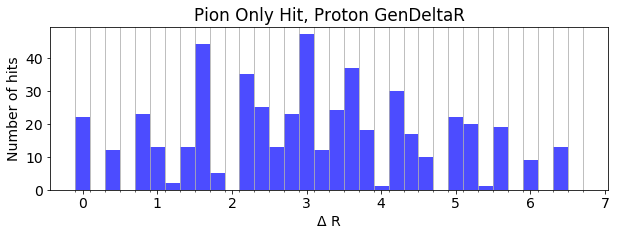

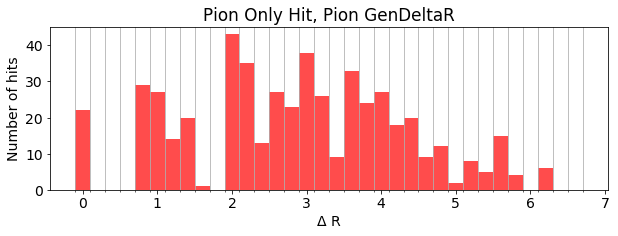

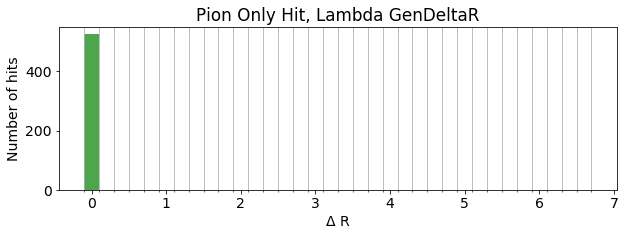

In [17]:
print("Total Shared Hits with Pion Only: %i" %(len(dfsharedpiononly)))
plotGenDeltaR(dfsharedpiononly, 'Pion Only')


Total Shared Hits Containing Lambda: 132


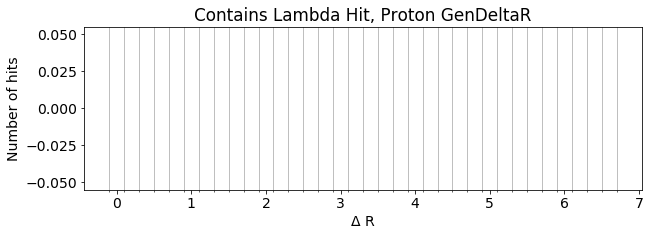

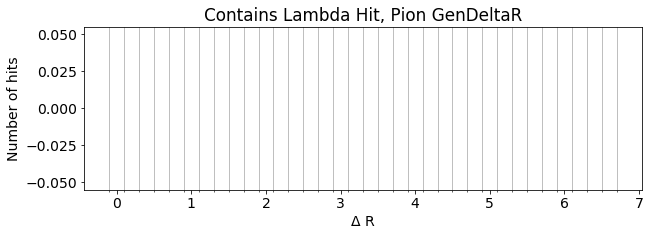

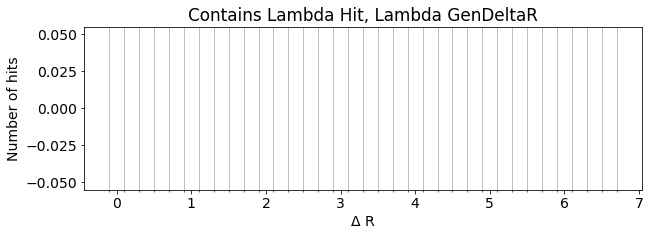

In [18]:
print("Total Shared Hits Containing Lambda: %i" %(len(dfsharedlambda)))
plotGenDeltaR(dfsharedlambda, 'Contains Lambda')
